@author: Octavio Gutiérrez de Código Máquina 

URL del canal: https://www.youtube.com/CodigoMaquina 

URL del video: https://youtu.be/U-vdLHdyDLI

<h2 style="color:purple">Gráficas de Retardo y Autocorrelación</h2> 

Para gráficas de retardo:
- lag_plot de Pandas 

Para gráficas de autocorrelación: 
- autocorrelation_plot de Pandas
- plot_acf de Statsmodels

<h2 style="color:violet">Librerías y personalización de gráficas</h2> 


In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from random import random
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

# Personalización de parámetros para todas las gráficas
plt.rcParams["figure.figsize"] = [16, 5]
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["lines.markerfacecolor"] = "purple"
plt.rcParams["lines.markeredgecolor"] = "purple"
plt.rcParams["lines.markersize"] = 6
plt.rcParams["patch.facecolor"] = "purple"
plt.rcParams["patch.edgecolor"] = "purple"

<h2 style="color:violet">Series de tiempo de Pasajeros con Estacionalidad</h2> 

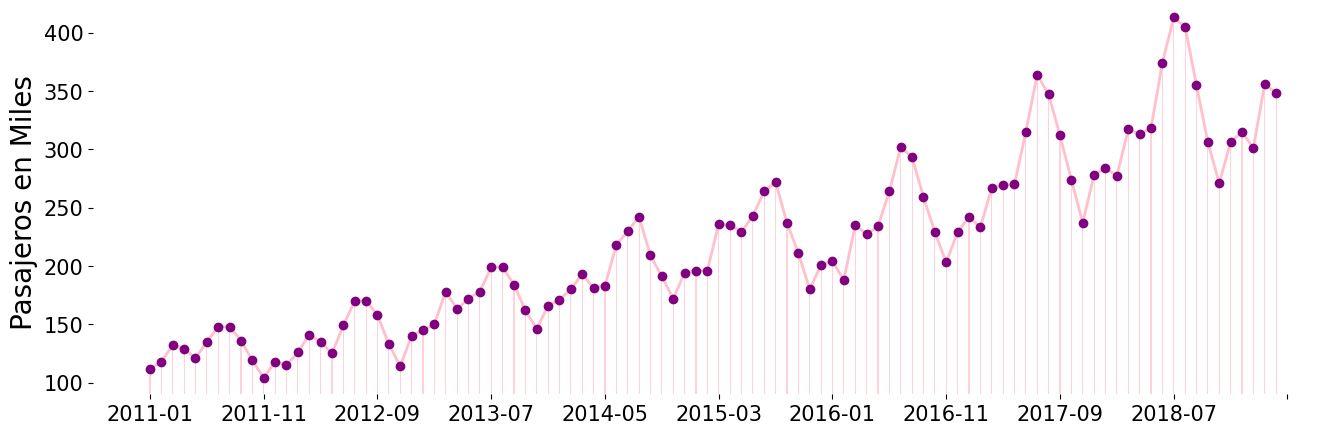

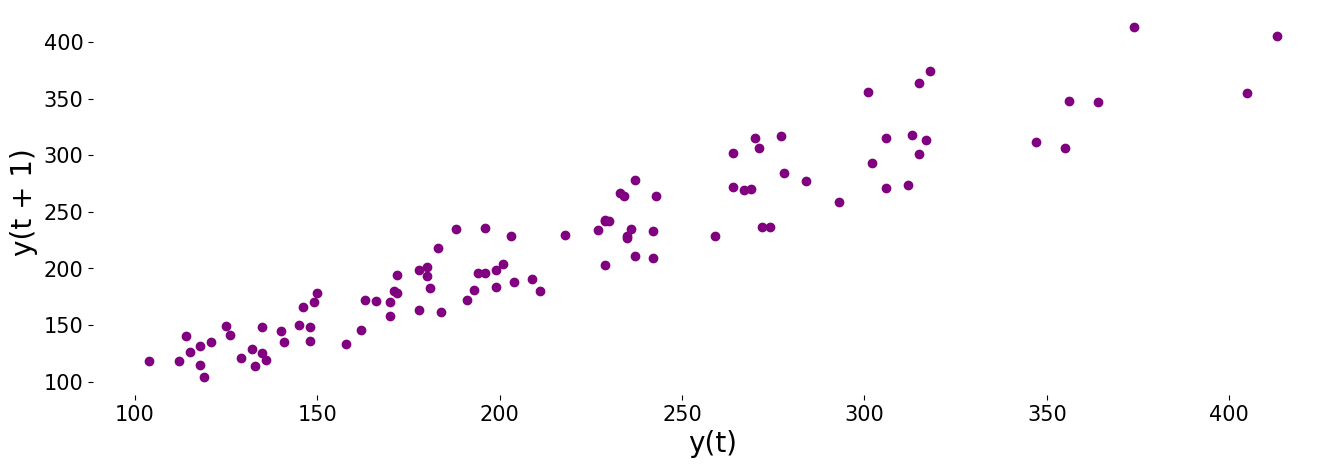

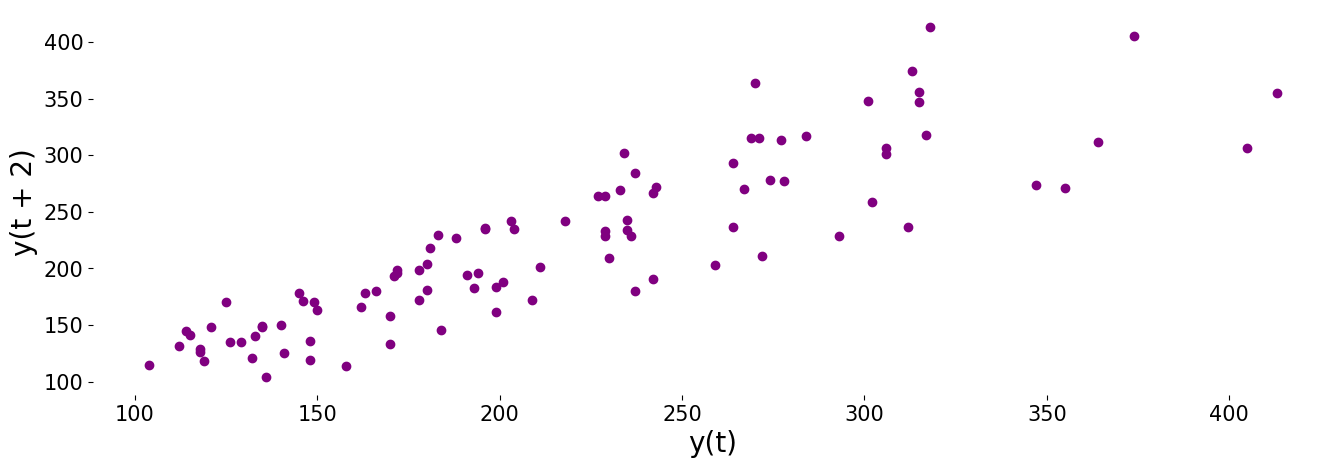

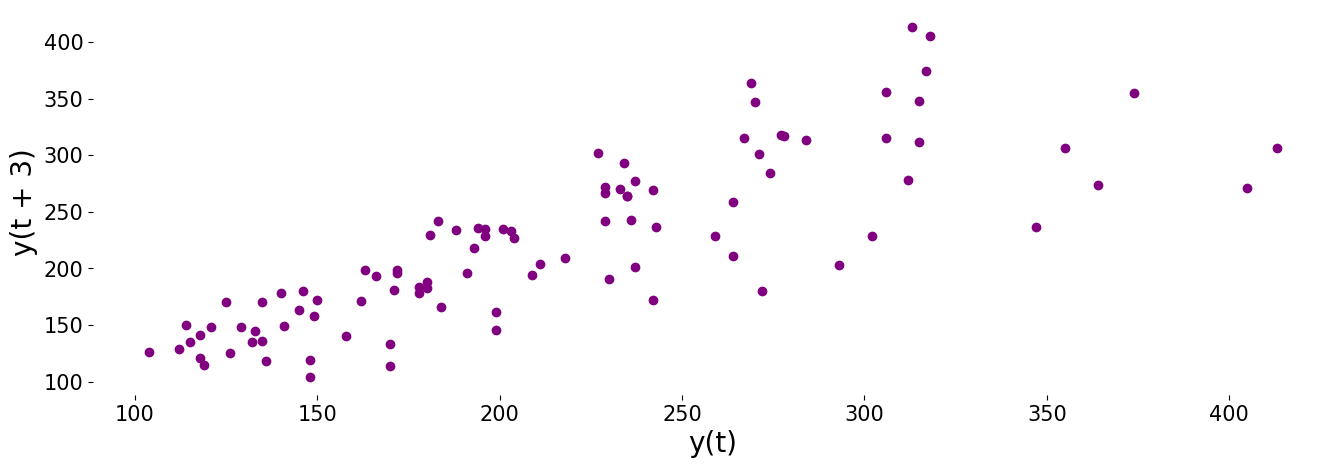

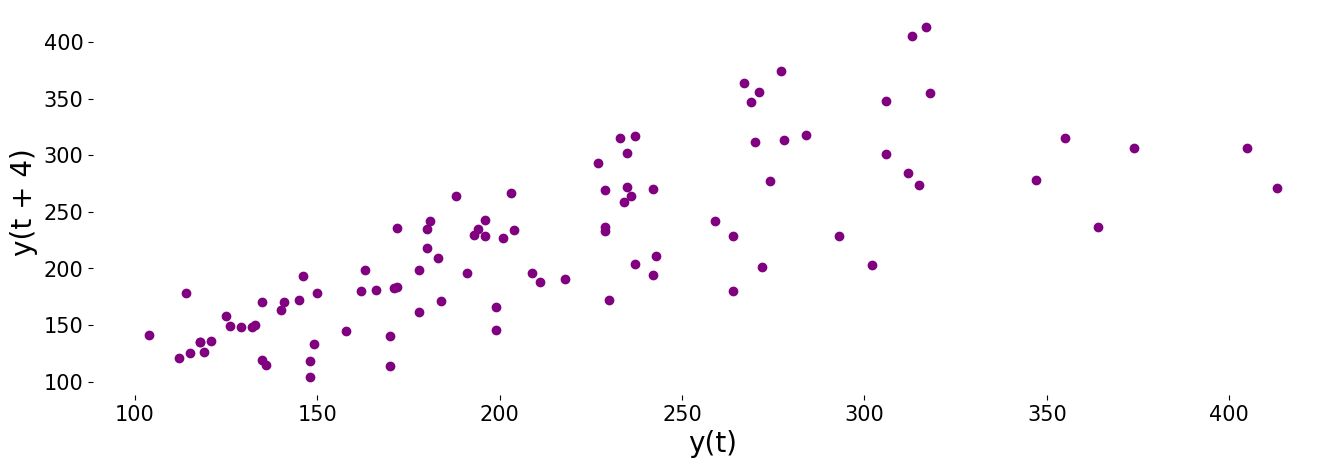

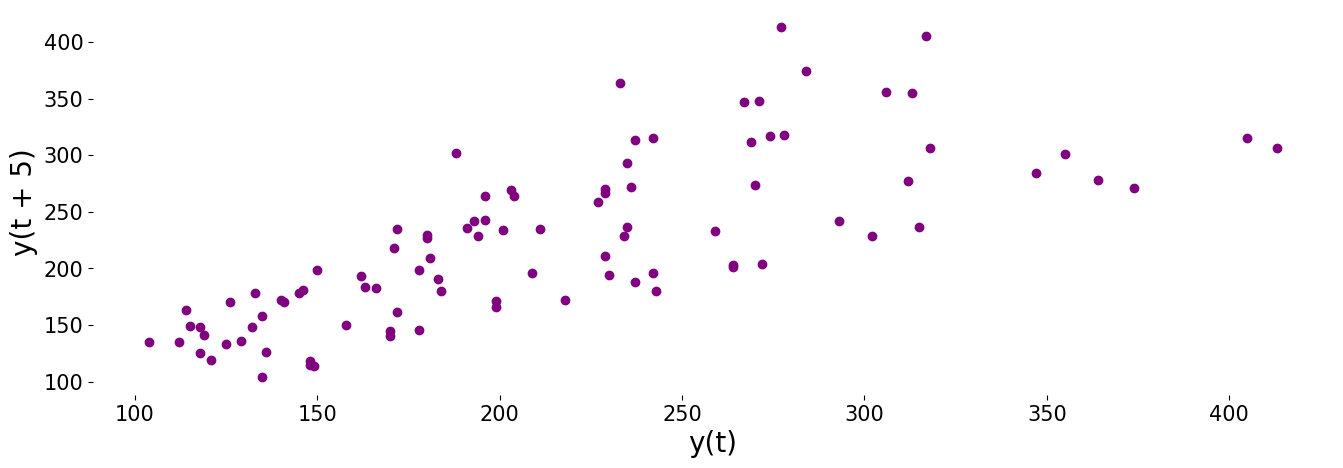

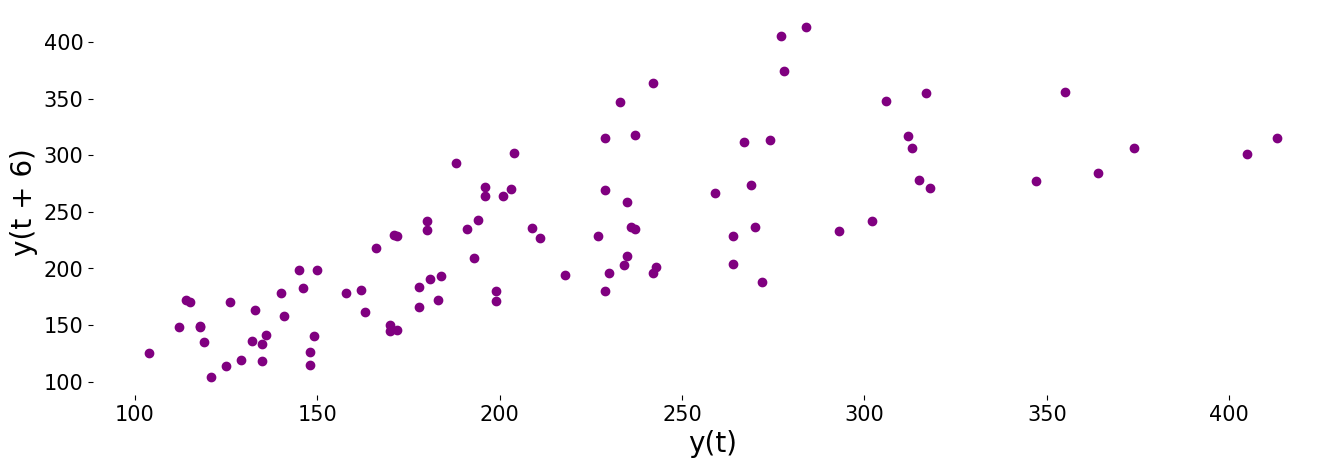

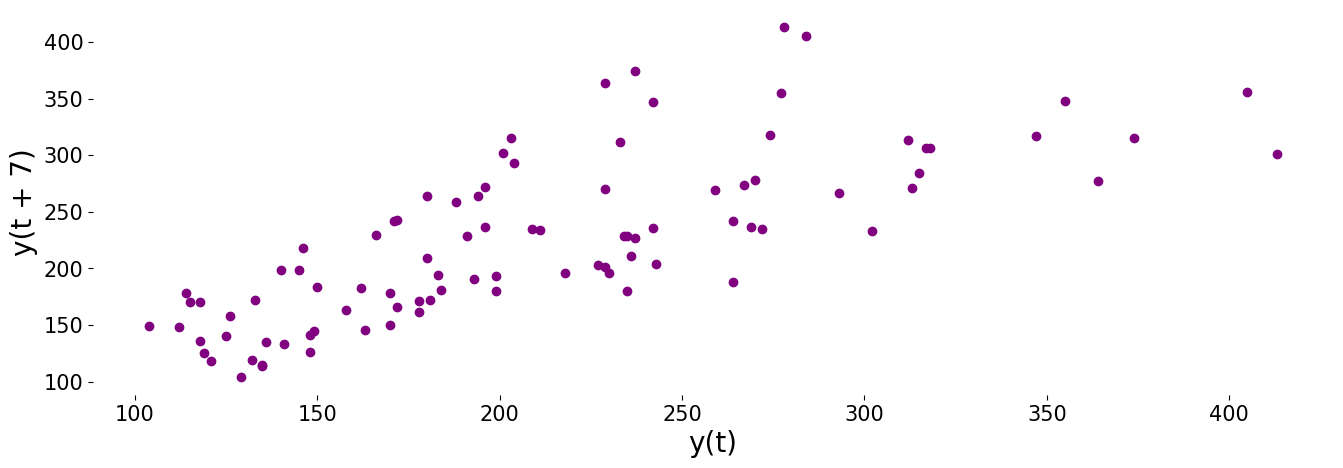

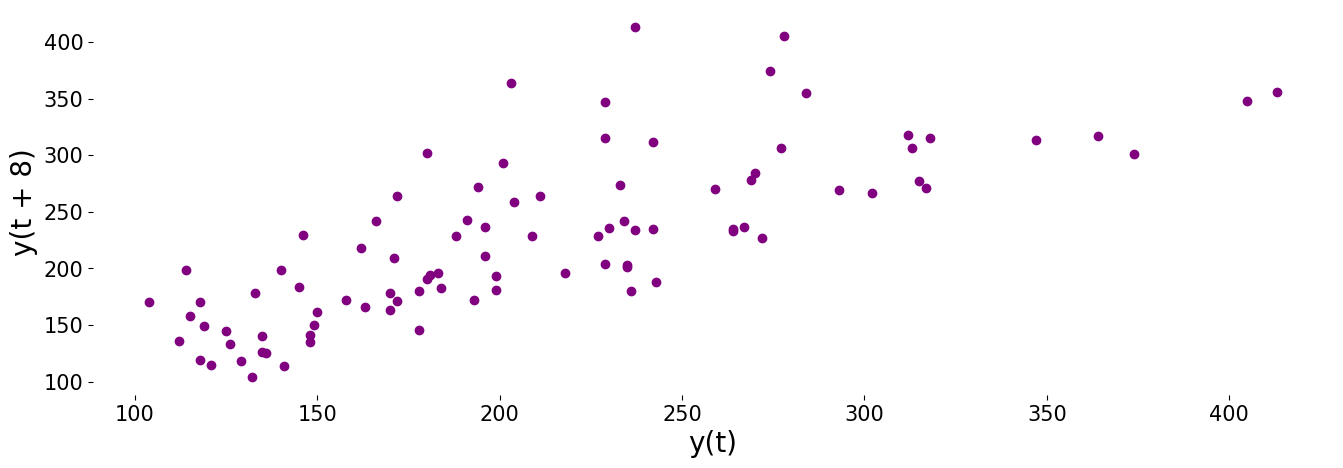

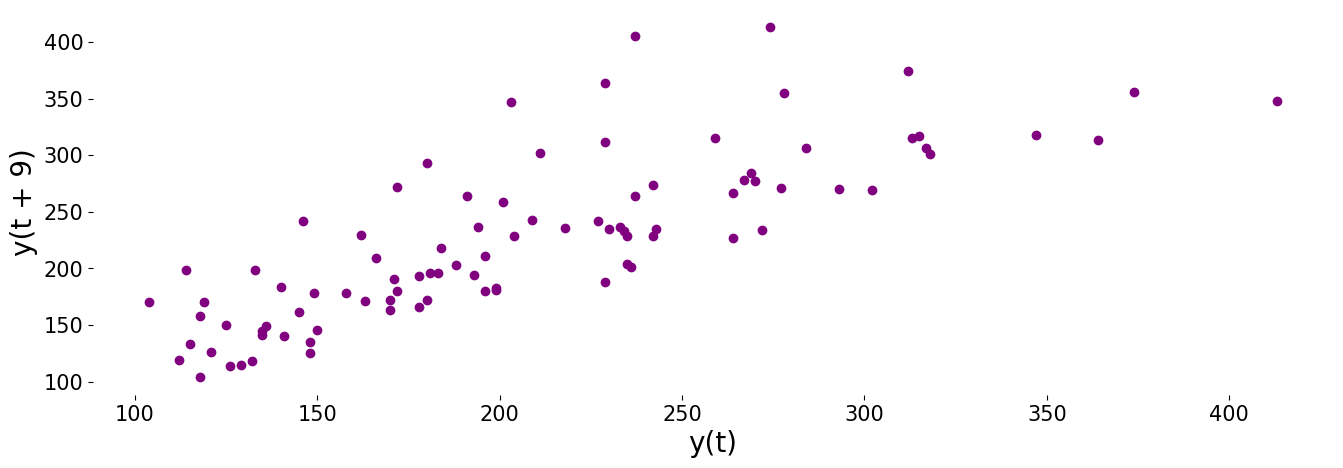

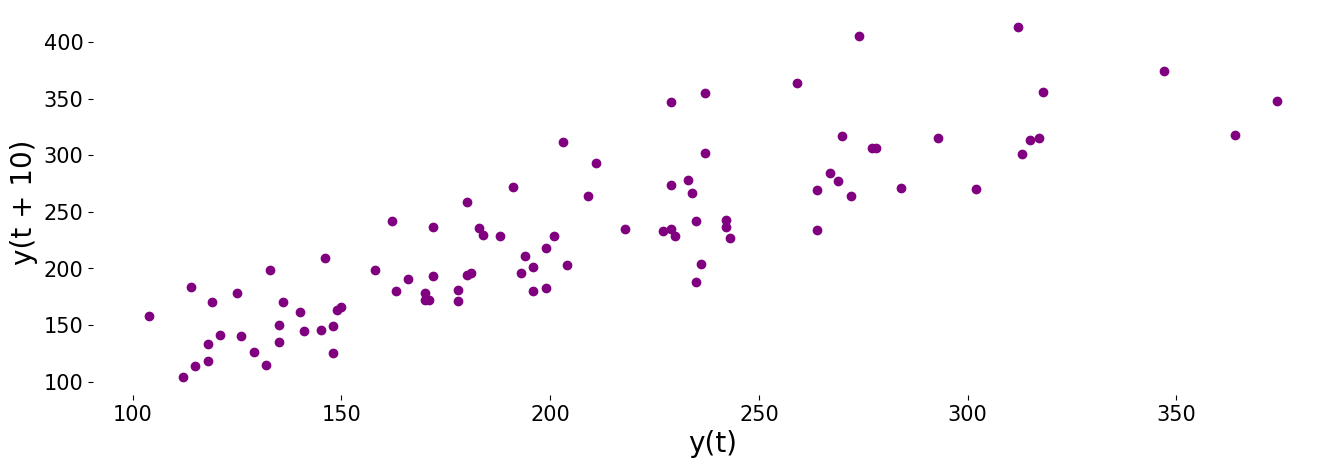

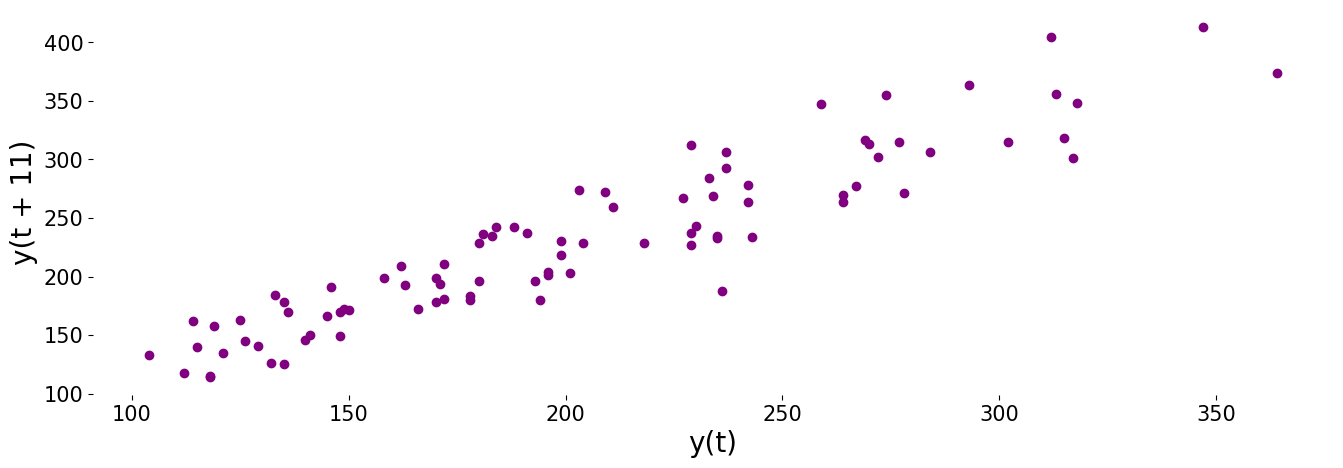

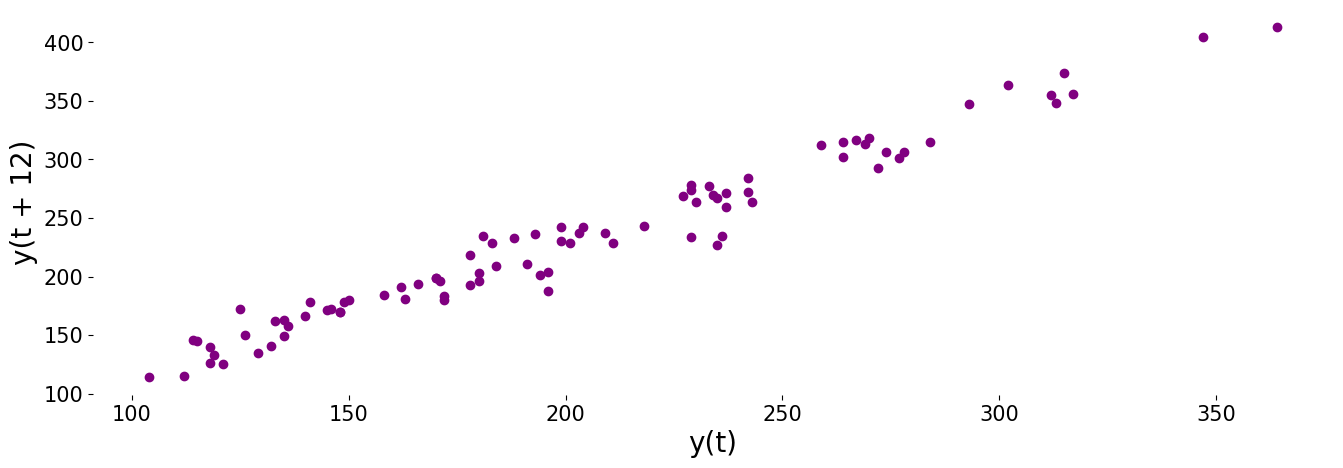

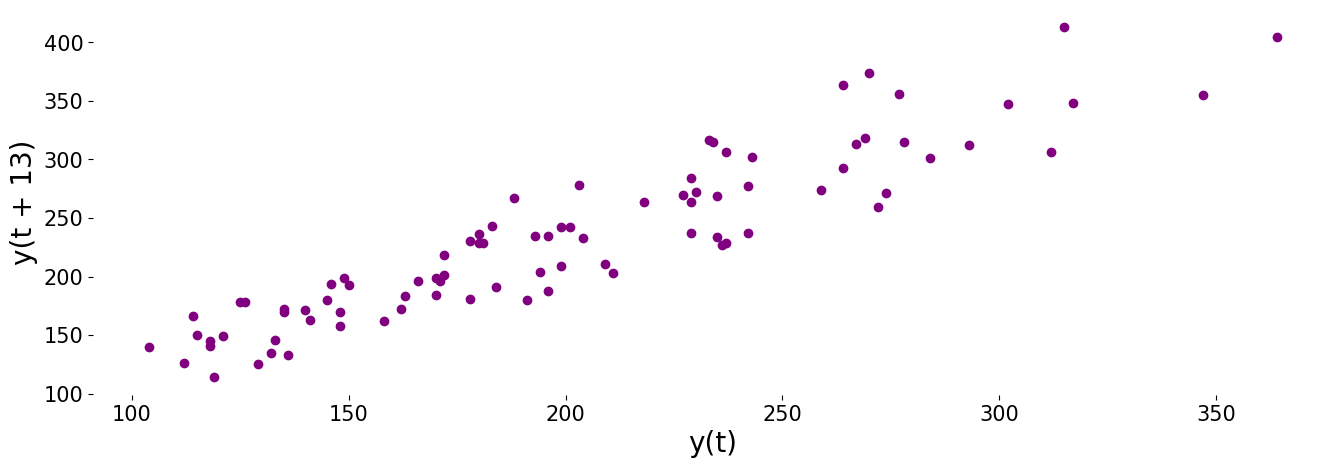

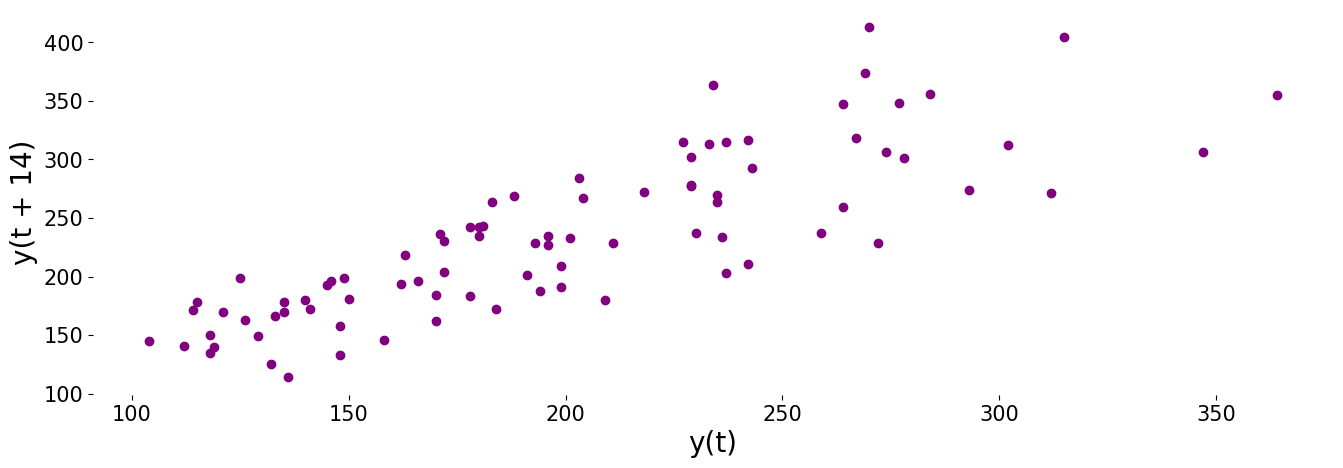

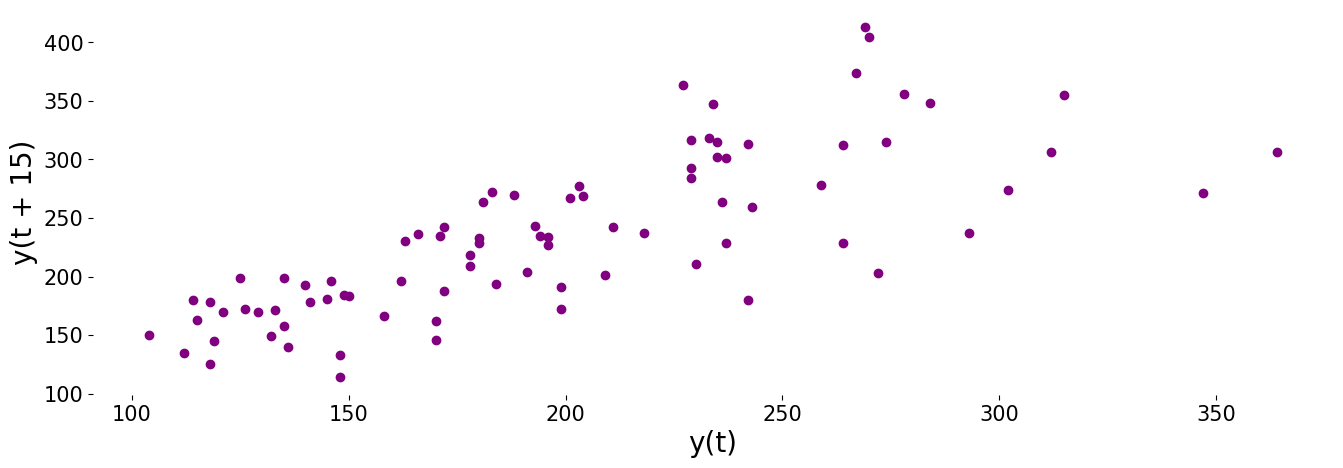

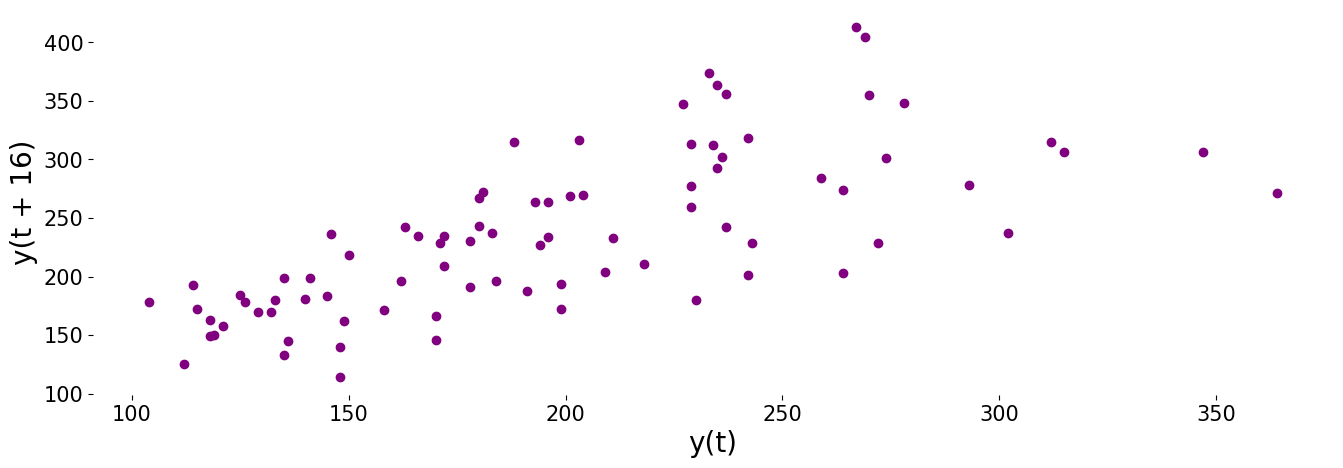

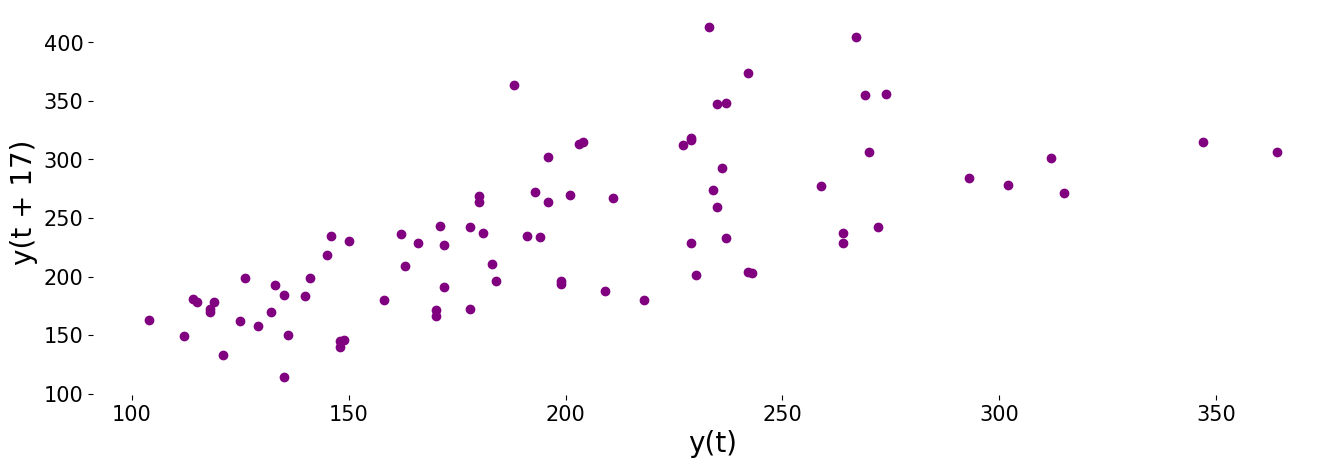

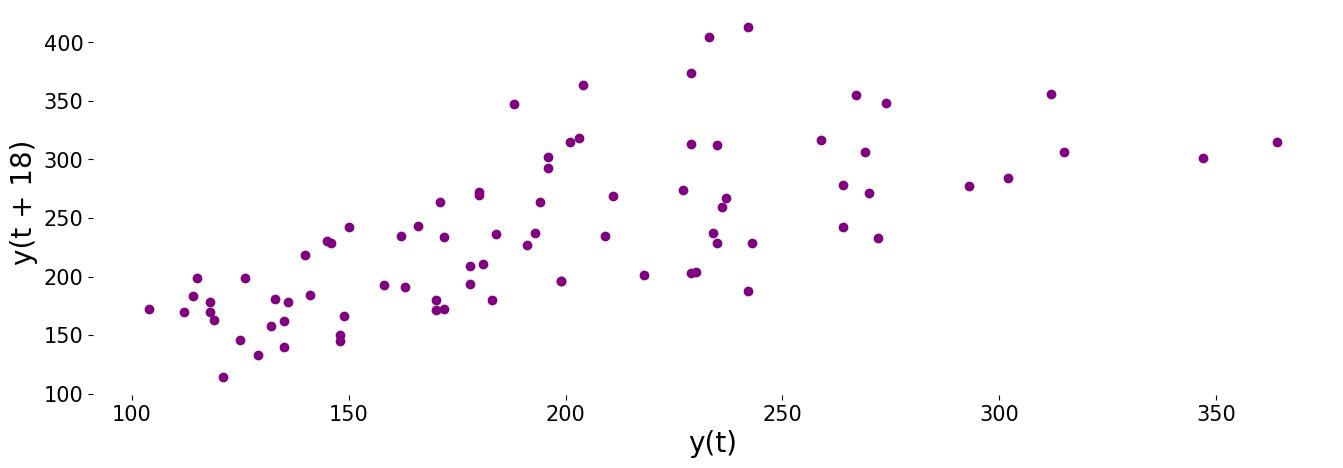

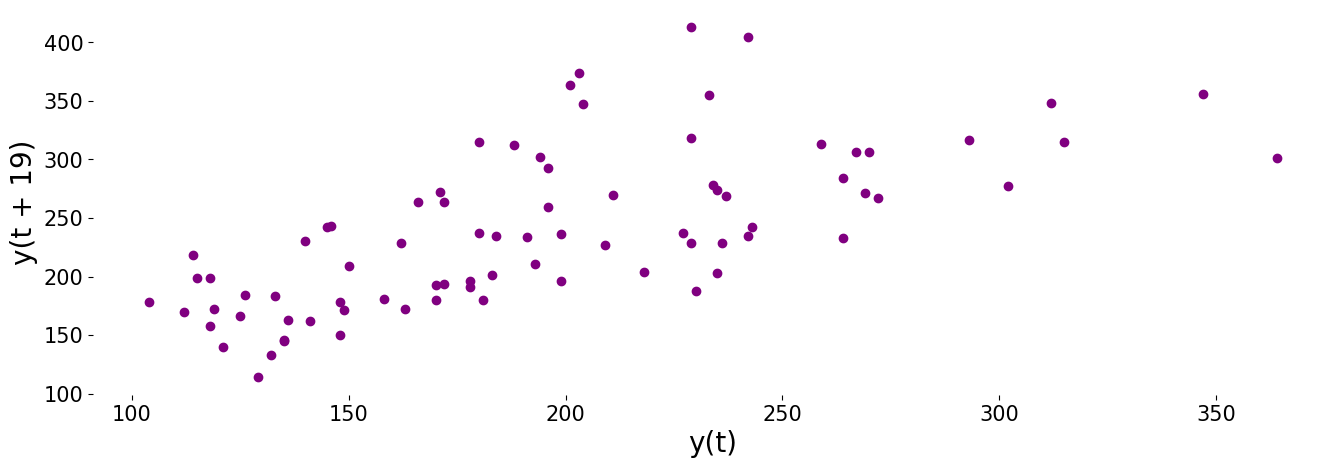

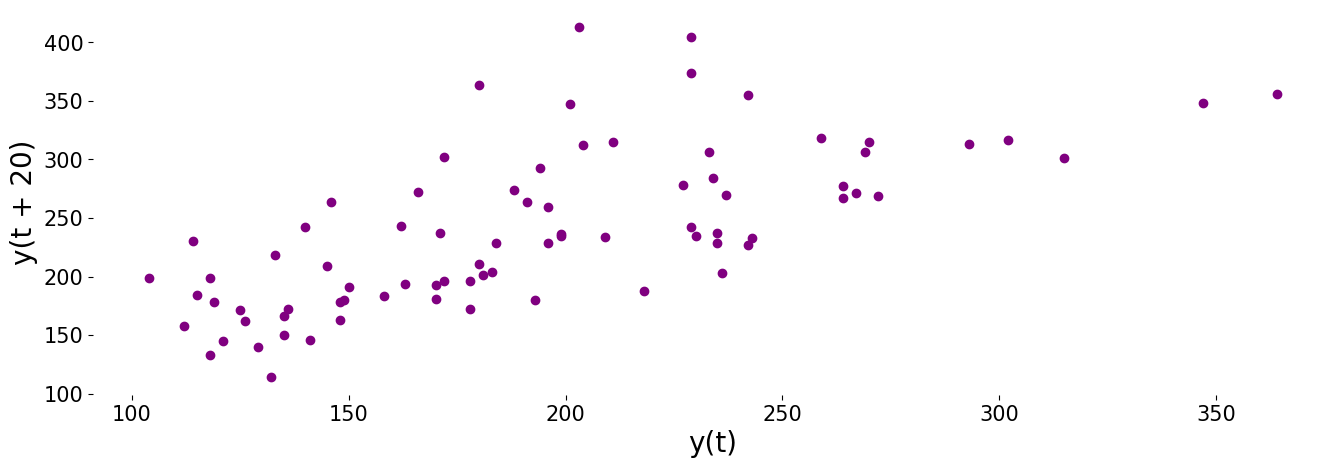

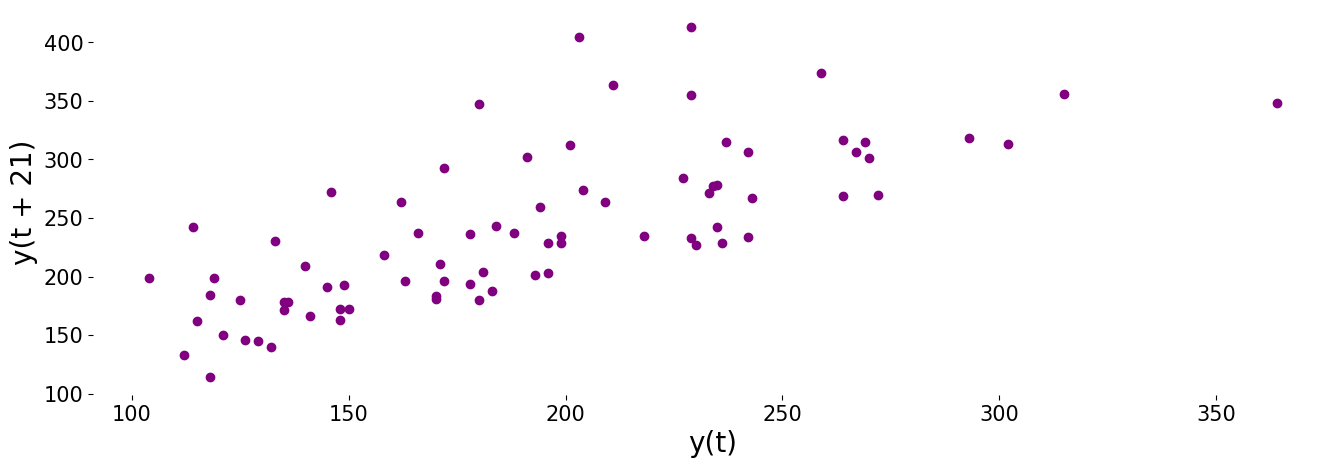

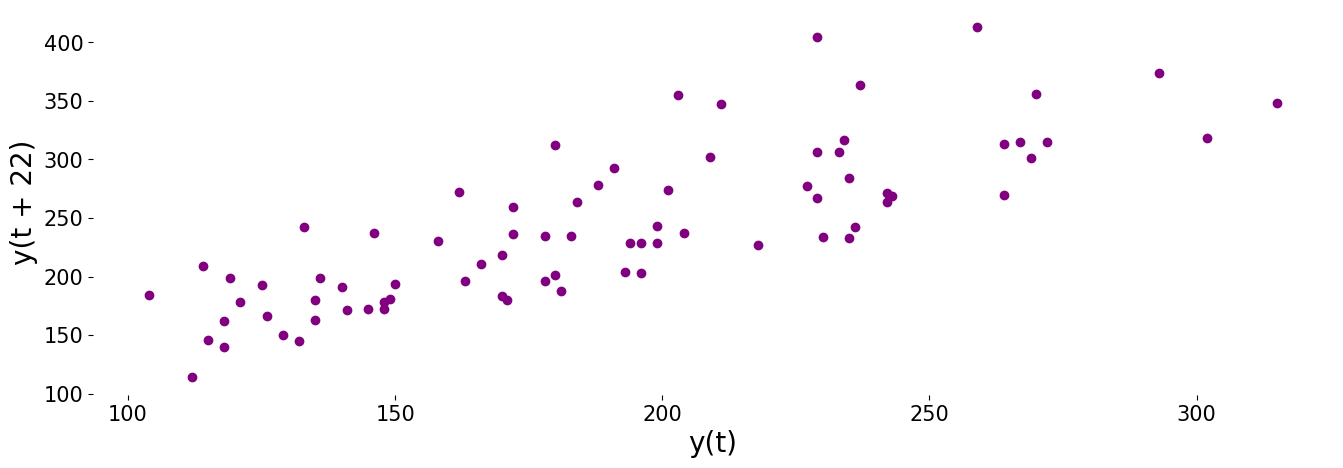

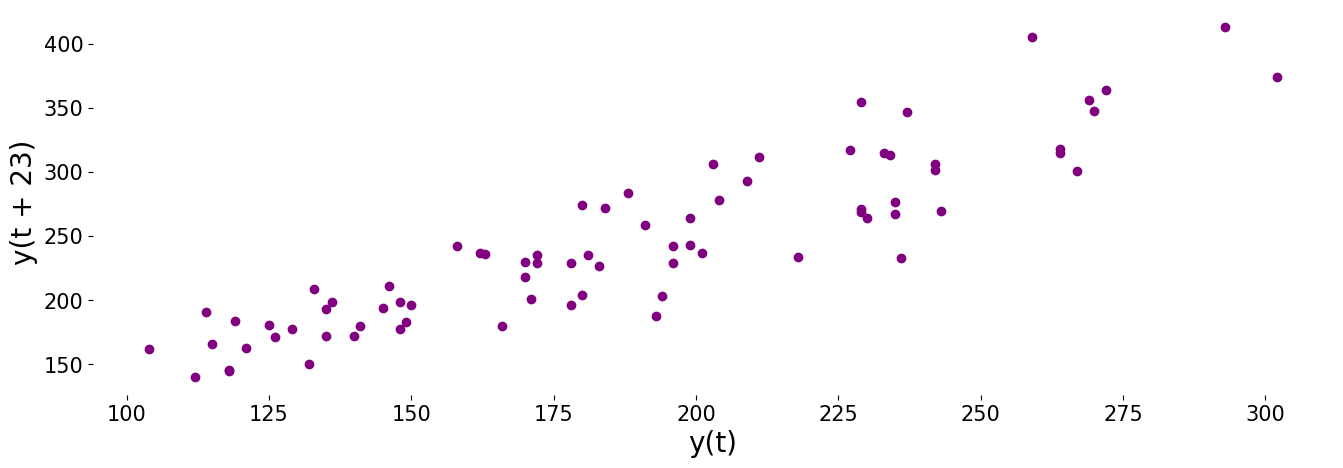

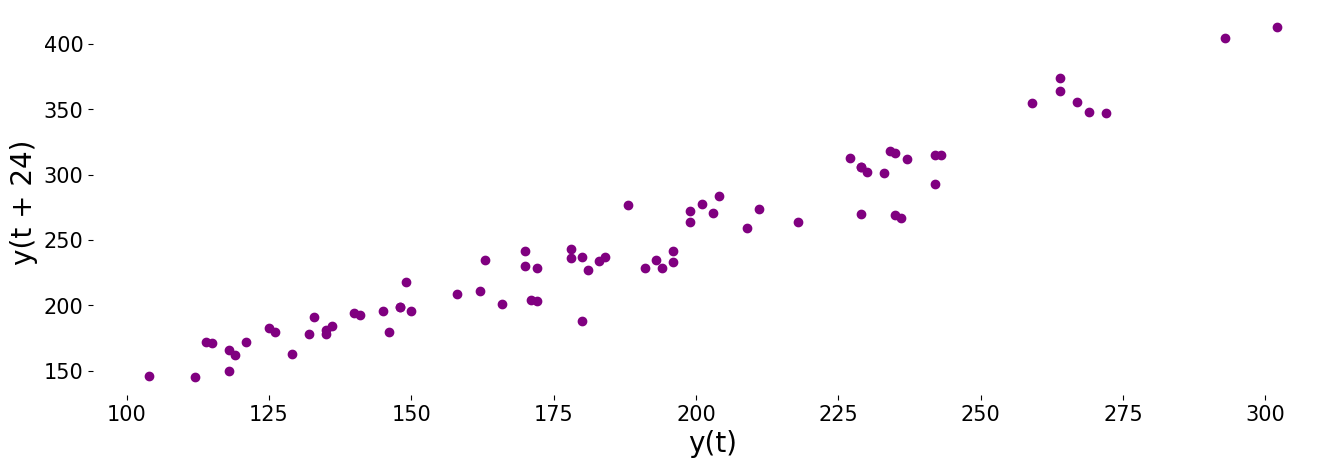

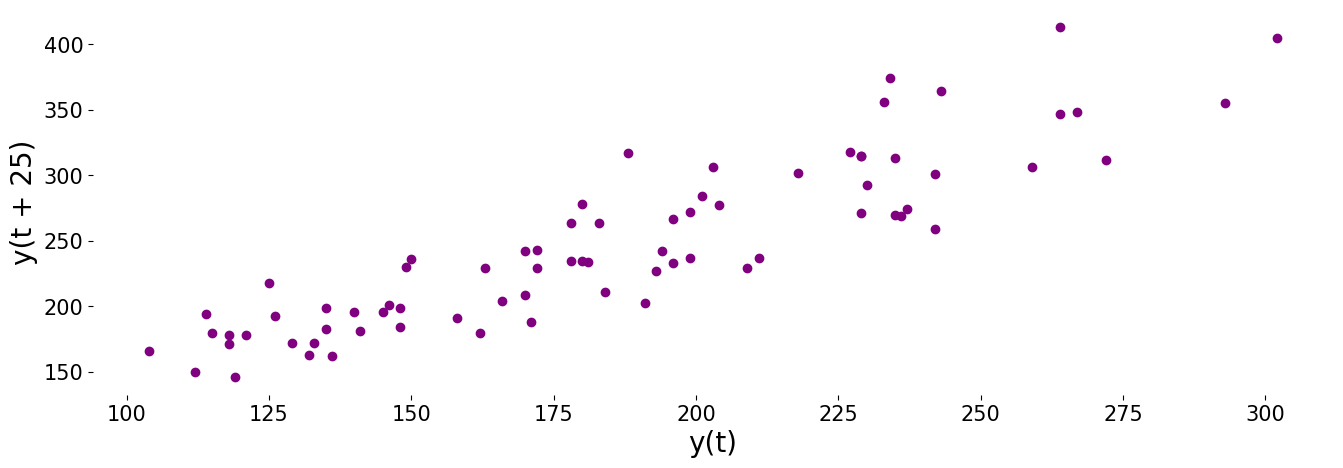

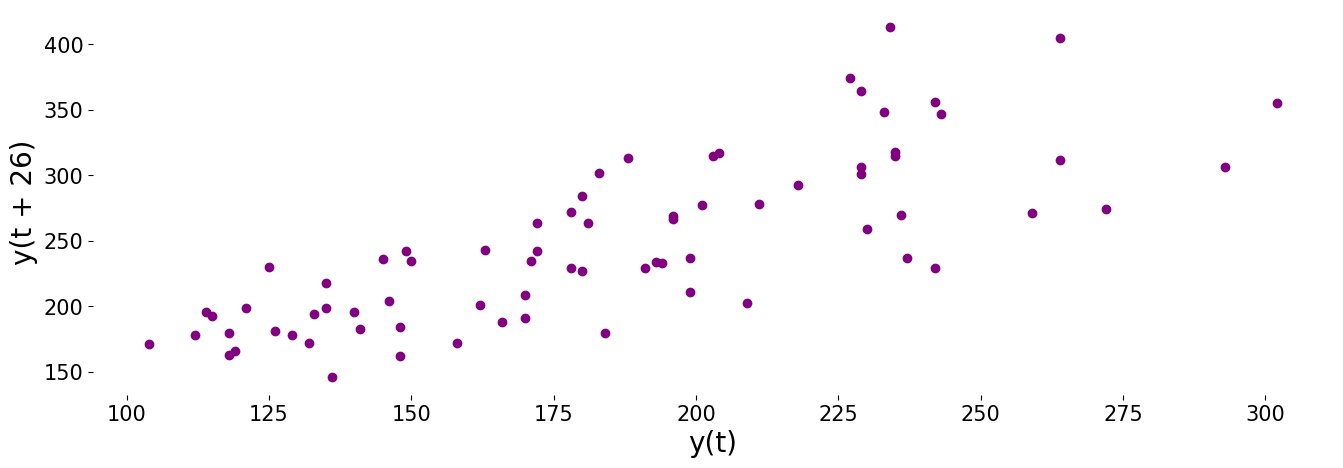

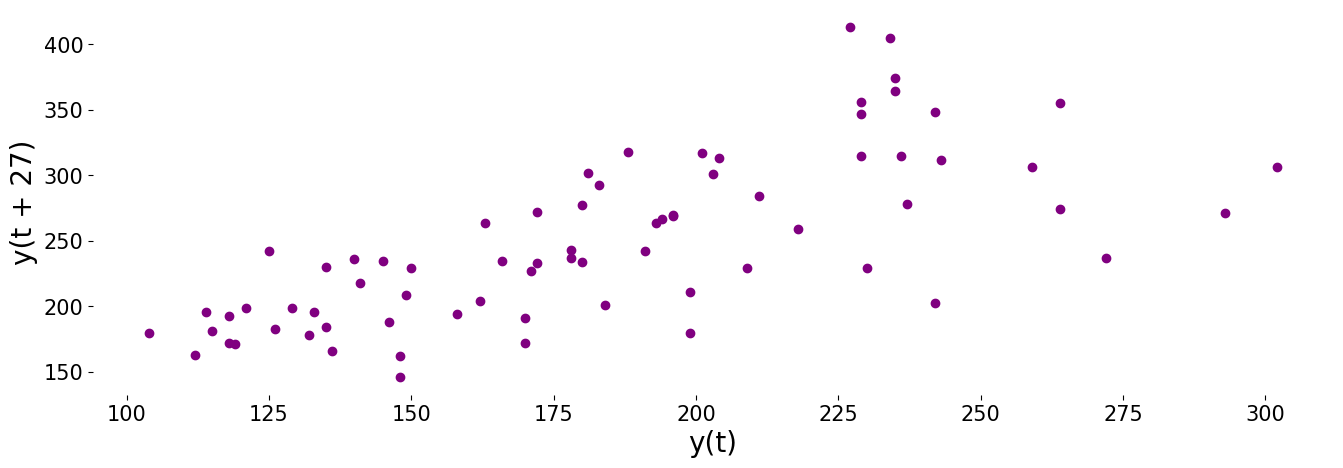

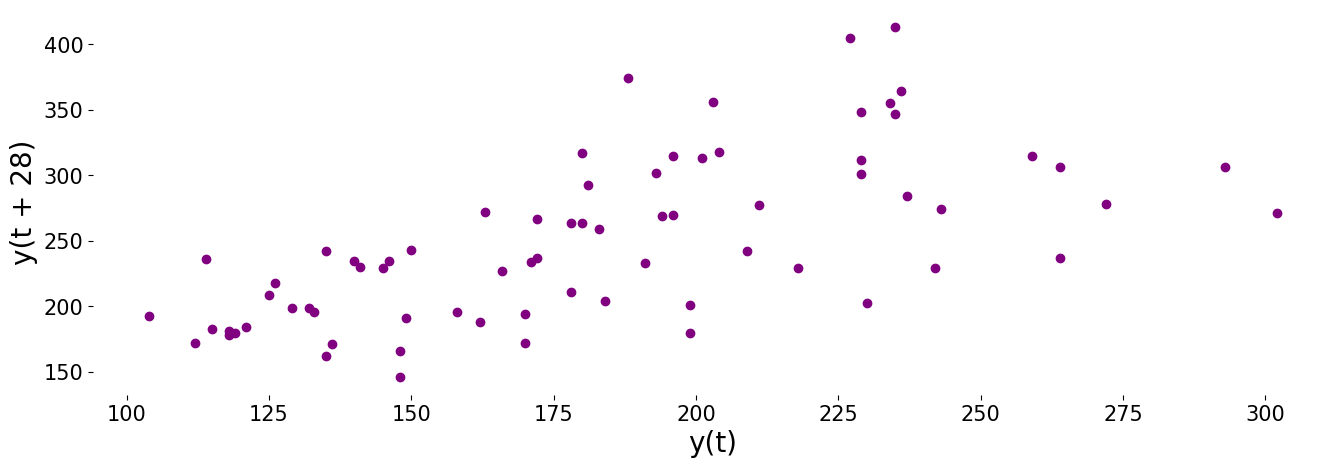

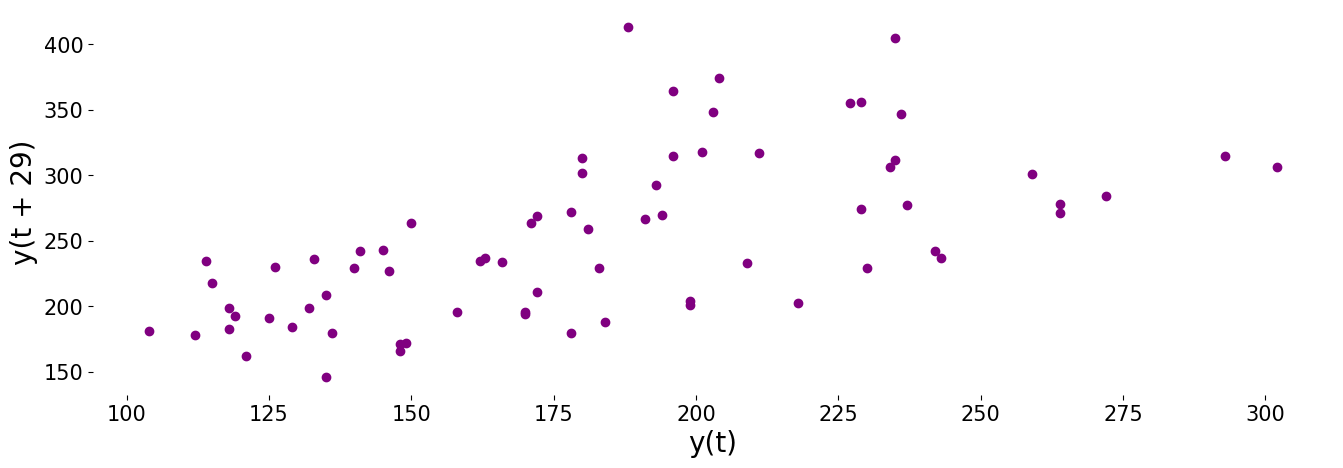

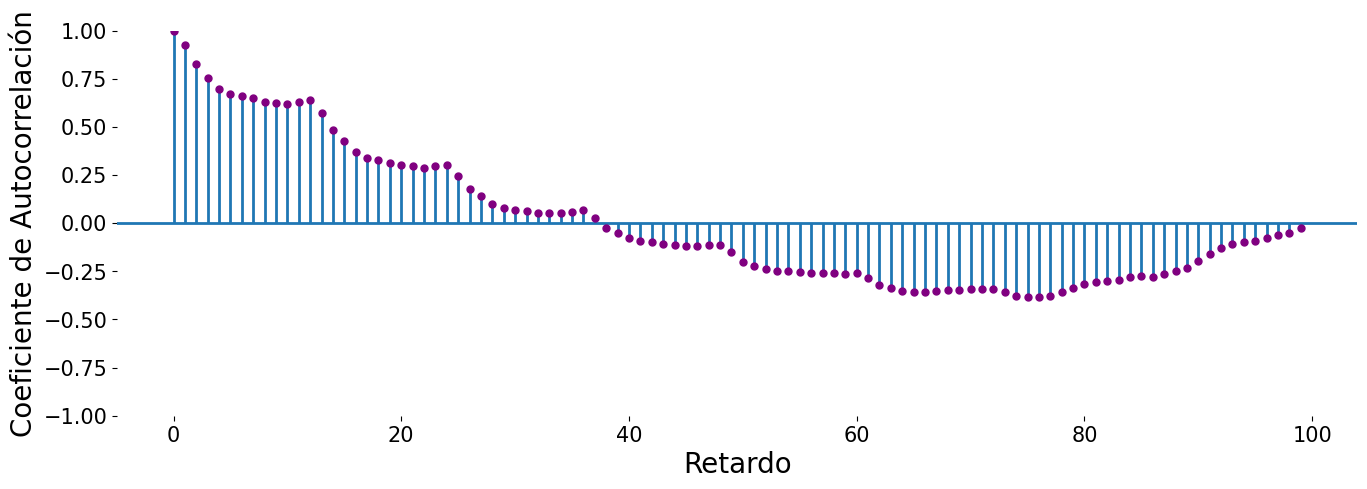

In [2]:
# Cargando datos
datos = pd.read_csv("pasajeros.csv")
datos = datos[["mes", "pasajeros"]].set_index(["mes"])

# Gráfica de la serie de tiempo
fig, ax = plt.subplots()
ax.set_ylim([90, 420])
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=10))
ax.plot(datos.index, datos["pasajeros"], 
        color="pink", marker="o", linestyle="-")
ax.bar(datos.index, datos["pasajeros"], 
       width=0.1, color="pink", alpha=0.7)
ax.set_ylabel("Pasajeros en Miles")
plt.show()

# Gráficas de retardo
for retraso in range(1, 30):
    pd.plotting.lag_plot(datos["pasajeros"], lag = retraso)
    plt.show()

# Gráfica de la función de autocorrelación
plot_acf(datos, lags=99, alpha=None)
plt.ylabel("Coeficiente de Autocorrelación")
plt.title("")
plt.xlabel("Retardo")
plt.show()

<h1 style="color:purple">Gráficas de Retardo y Autocorrelación</h1> 
<h2 style="color:violet">Series de tiempo de Linces con Patrón Cíclico</h2> 

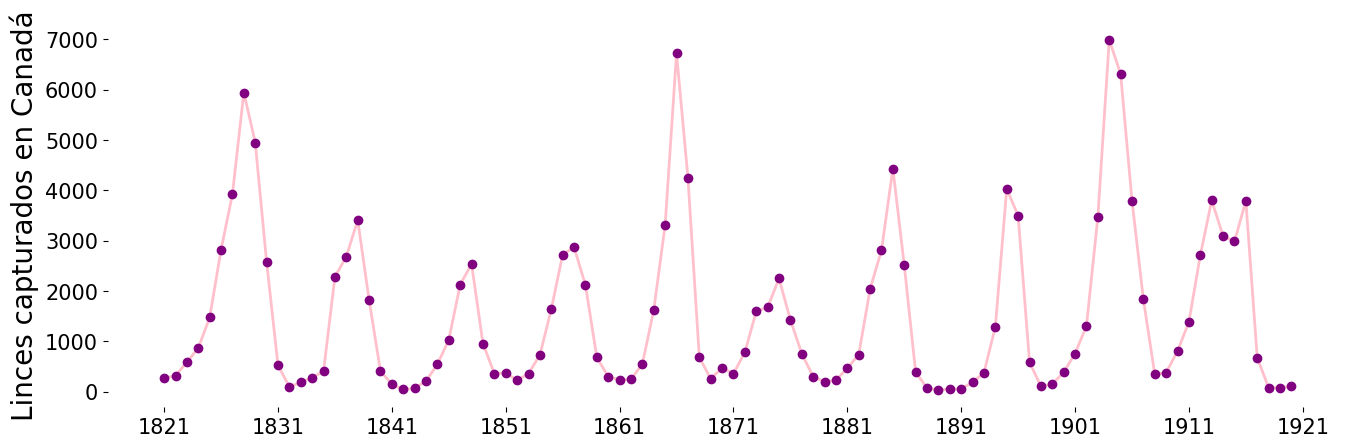

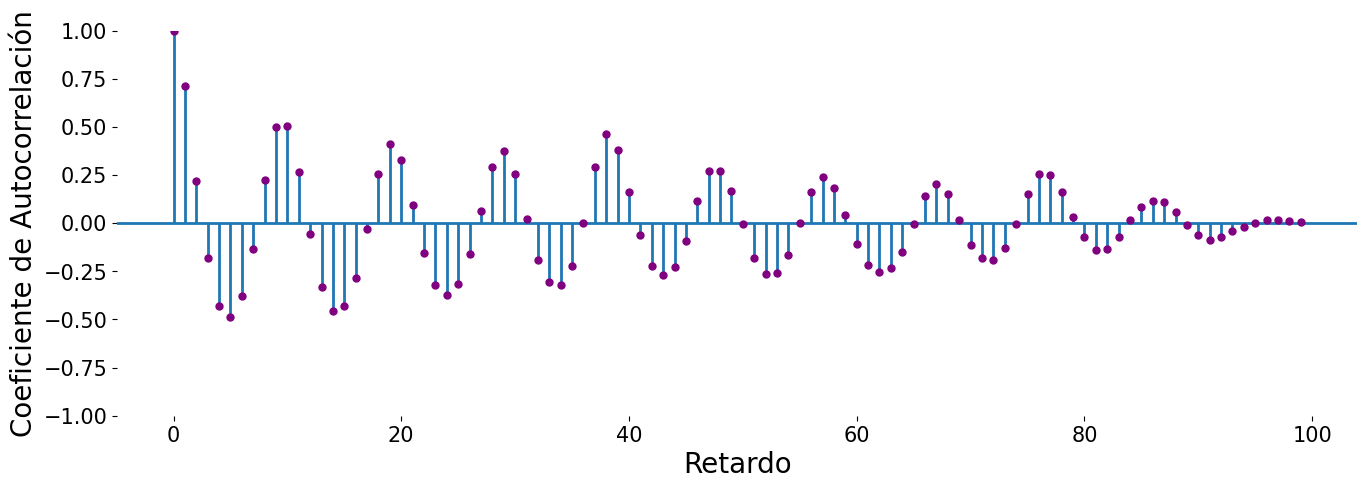

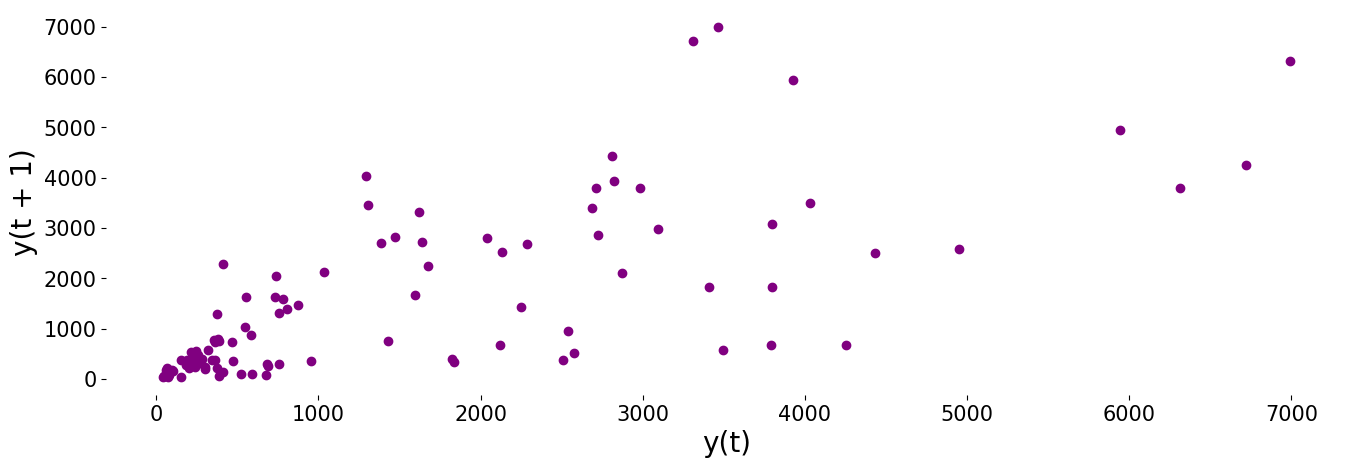

In [3]:
# Cargando datos
datos = pd.read_csv("linces.csv")
datos = datos[["fecha", "linces"]].set_index(["fecha"])

# Gráfica de la serie de tiempo
fig, ax = plt.subplots()
ax.plot(datos.index, datos["linces"], 
        color="pink", marker="o", linestyle="-")
ax.set_ylabel("Linces capturados en Canadá")
ax.xaxis.set_ticks(np.arange(1821, 110+1821, 10))
ax.set_xticklabels(["1821", "1831", "1841", "1851", "1861", "1871", "1881", "1891", "1901", "1911", "1921"])
plt.show()

# Gráfica de la función de autocorrelación
plot_acf(datos, lags=99, alpha=95)
plt.ylabel("Coeficiente de Autocorrelación")
plt.xlabel("Retardo")
plt.title("")
plt.show()

# Gráfica de retardo
pd.plotting.lag_plot(datos["linces"], lag=1)
plt.show()


<h1 style="color:purple">Ruido Blanco</h1> 

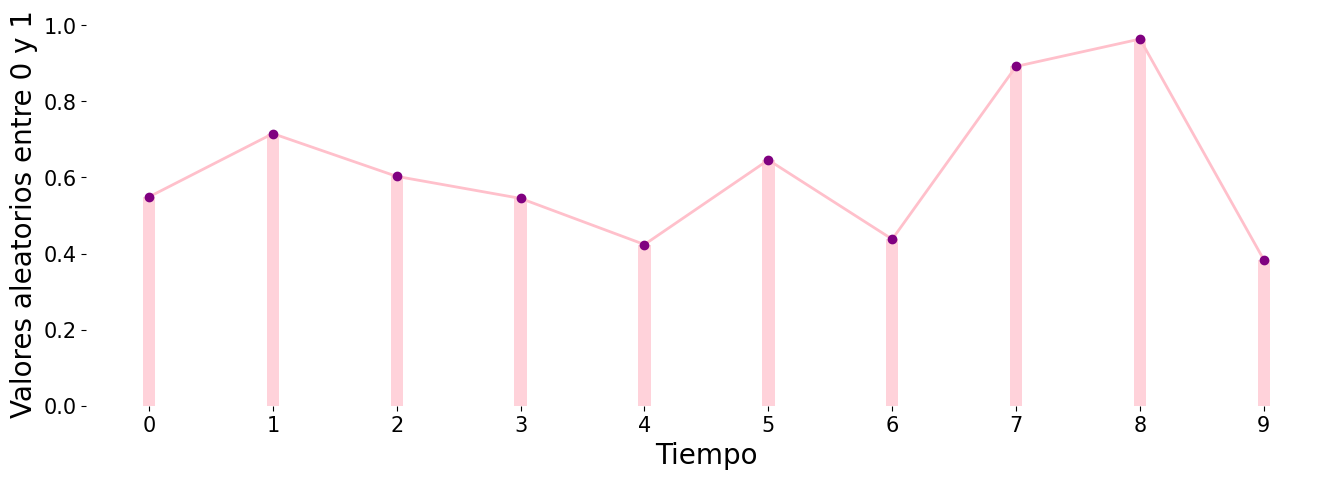

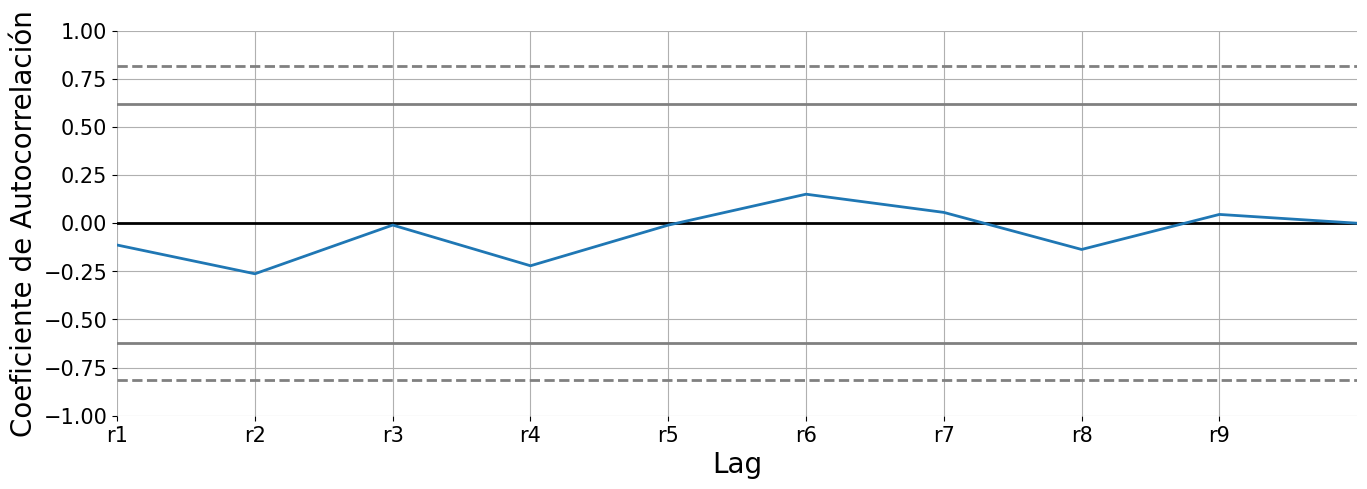

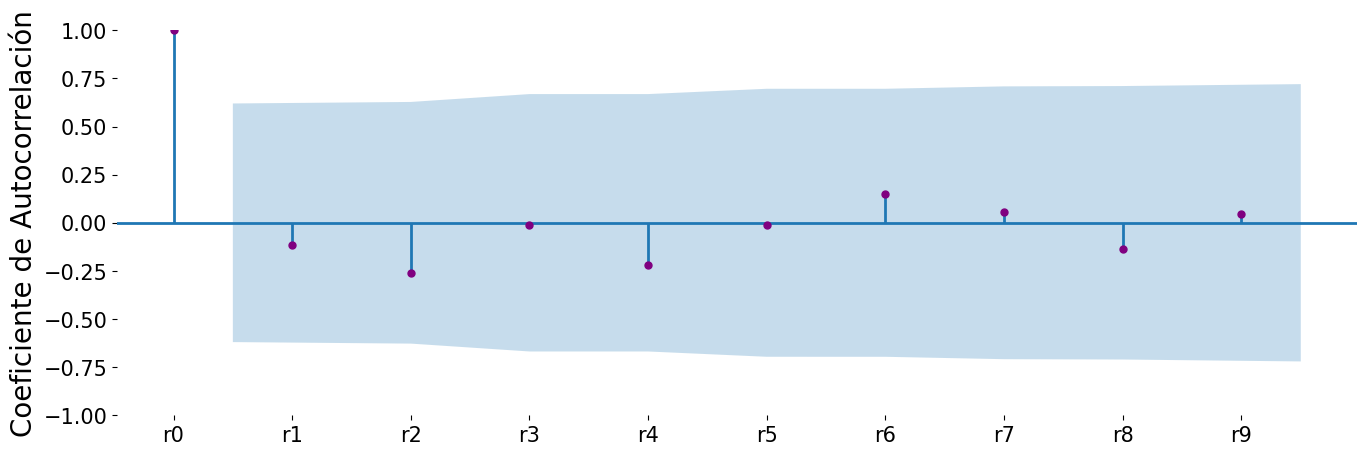

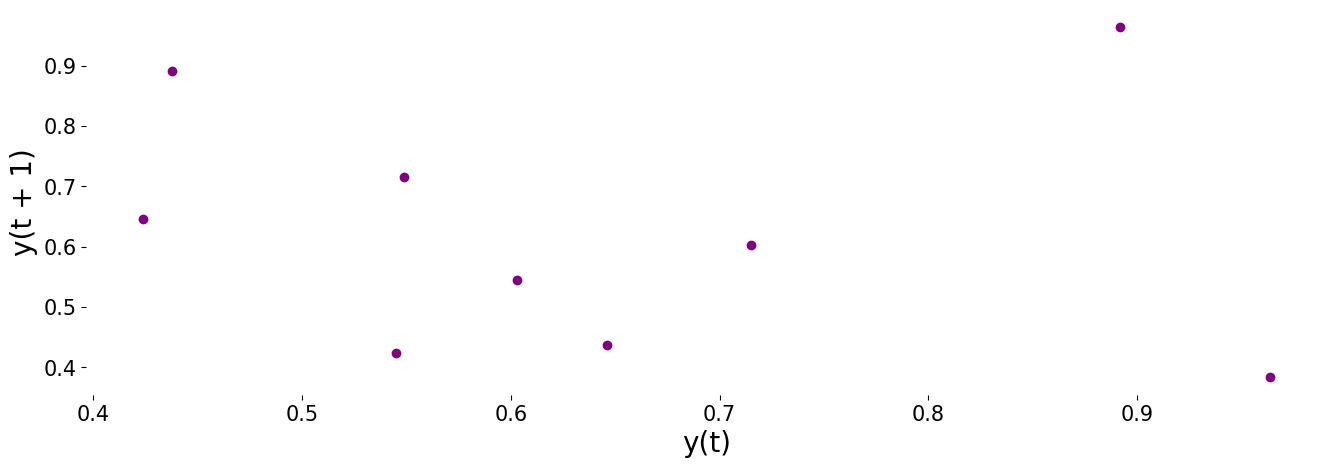

In [4]:
# Generando serie de tiempo con valores aleatorios
np.random.seed(0)
datos = pd.DataFrame()
datos["aleatorio"] = np.random.random(10)

# Gráfica de la serie de tiempo
fig, ax = plt.subplots()
ax.plot(np.arange(datos["aleatorio"].size), datos["aleatorio"], 
        color="pink", marker="o", linestyle="-")
ax.bar(np.arange(datos["aleatorio"].size), datos["aleatorio"],
       width=0.1, color="pink", alpha=0.7)
ax.set_ylabel("Valores aleatorios entre 0 y 1")
ax.set_xlabel("Tiempo")
ax.set_xticks(range(datos["aleatorio"].size))
plt.show()

# Gráfica de la función de autocorrelación versión pandas
pd.plotting.autocorrelation_plot(datos["aleatorio"])
plt.title("")
etiquetas = ["r" + str(i) for i in range(1, datos["aleatorio"].size)]
plt.xticks(ticks=range(1, datos["aleatorio"].size), labels=etiquetas)
plt.ylabel("Coeficiente de Autocorrelación")
plt.show()

# Gráfica de la función de autocorrelación versión statsmodels
plot_acf(datos["aleatorio"], lags=9)
plt.title("")
etiquetas = ["r" + str(i) for i in range(datos["aleatorio"].size)]
plt.xticks(ticks=range(datos["aleatorio"].size), labels=etiquetas)
plt.ylabel("Coeficiente de Autocorrelación")
plt.show()

pd.plotting.lag_plot(datos, lag=1)
plt.show()